In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
import numpy as np

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

**52**.For this DataFrame df, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

**53**. Now create a new column for this DataFrame called 'adjacent'. This column should contain the number of mines found on adjacent squares in the grid.

(E.g. for the first row, which is the entry for the coordinate (0, 0), count how many mines are found on the coordinates (0, 1), (1, 0) and (1, 1).)

**54**.For rows of the DataFrame that contain a mine, set the value in the 'adjacent' column to NaN.

**55**.Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the x coordinate, rows are the y coordinate.

**56**. Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [8]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

<Axes: xlabel='xs', ylabel='ys'>

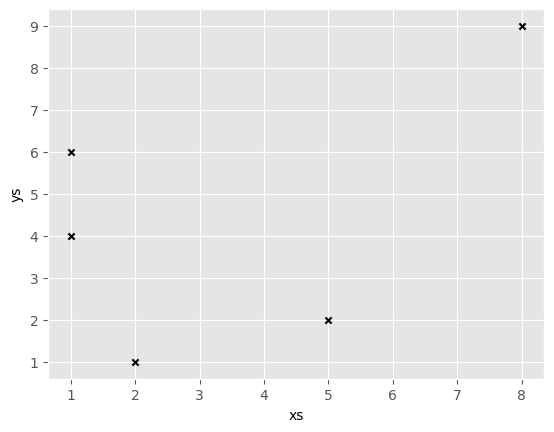

In [9]:
df.plot.scatter("xs", "ys", color = "black", marker = "x")

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

In [10]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

<Axes: xlabel='hours_in', ylabel='productivity'>

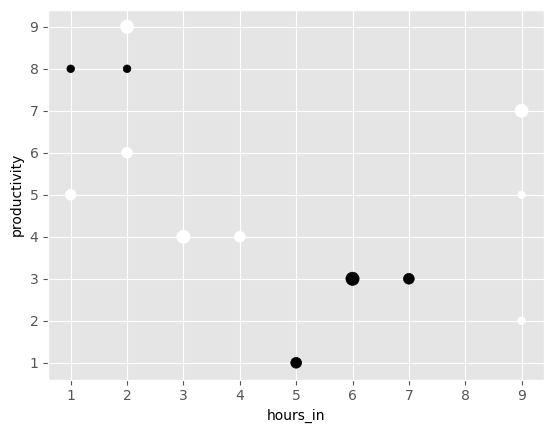

In [11]:
df.plot.scatter("hours_in", "productivity", s = df.happiness * 30, c = df.caffienated)

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

In [12]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })


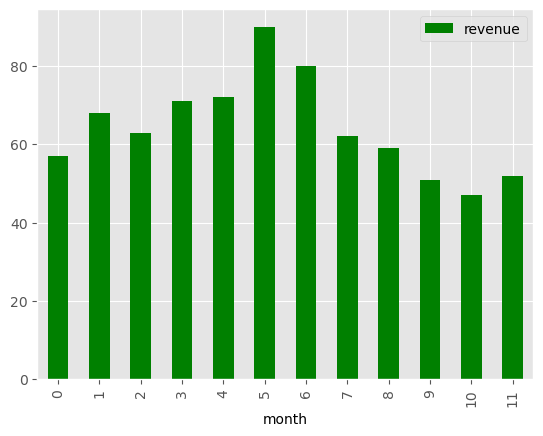

In [13]:
ax = df.plot.bar("month", "revenue", color = "green")

In [14]:
df.plot.line("month", "advertising", secondary_y = True, ax = ax)

<Axes: >

In [15]:
ax.set_xlim((-1,12))

(-1.0, 12.0)

(-1.0, 12.0)

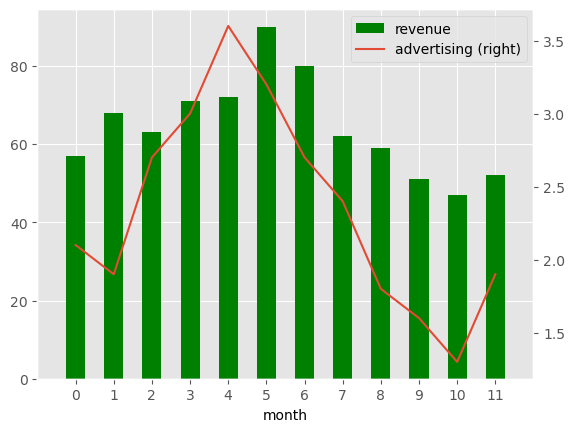

In [16]:
ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))

**59**.Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [19]:
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)
def day_stock_data():
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df


    

In [23]:
def plot_candlestick(agg):
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)
    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

In [24]:
df = day_stock_data()
df.head()

,time,price
0,2023-10-31 09:30:00,100.000000
1,2023-10-31 09:30:00,100.067951
2,2023-10-31 09:30:03,100.134752
3,2023-10-31 09:30:04,100.083862
4,2023-10-31 09:30:12,99.989329


In [25]:
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

,open,high,low,close,color
time,,,,,
2023-10-31 09:00:00,100.000000,101.125874,99.493250,100.674817,green
2023-10-31 10:00:00,100.755991,102.548440,100.307466,101.189442,green
2023-10-31 11:00:00,101.143857,102.334656,100.076022,100.877508,red
2023-10-31 12:00:00,100.874083,101.682651,99.783306,101.682651,green
2023-10-31 13:00:00,101.703746,101.819208,98.822490,99.904598,red


**60**. Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart. Use the plot_candlestick(df) function above, or matplotlib's plot documentation if you get stuck.

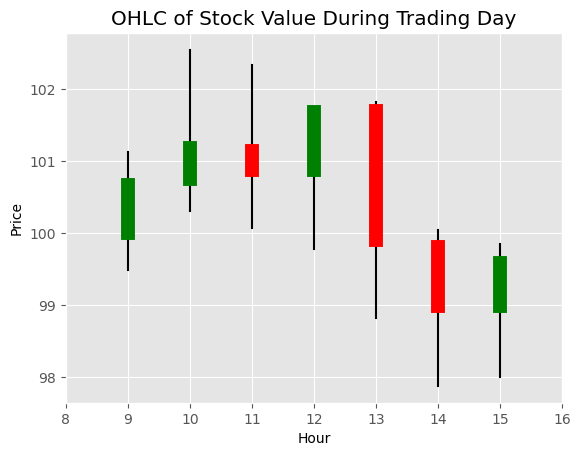

In [26]:
plot_candlestick(agg)